<h1 align="center"> Face Recognition </h1>
<h2 align="center"> EE5907 Assignment 2 </h2>
<h3 align="center"> Name: Peng Hongyi &nbsp&nbsp  Matric No.: A0206704M</h3>

<br>
<br>
<h2> 1. Introduction </h2>
<p>This report presents studies on developing a face Recognition system with different approaches. Classfication models implmented includes:</p>
<ul>
<li> PCA for feature extraction and nearset neighbor for calssfication.</li> 
<li> LDA for feature extraction and nearset neighbor for classfication.</li>
<li> SVM for classfication.</li>
<li> CNN for calssfication.</li>
</ul>
<p> All of models mentioned above are implmented in Jupyter Notebook environment and the dependencies required to run the code are listed below:</p>
<ul>
<li><a href="https://numpy.org/" style="text-decoration:none">Numpy</a> for scientific computing.</li>
<li><a href="https://matplotlib.org/" style="text-decoration:none">Matplotlib</a> for graph plotting and data visualization.</li>
<li><a href="https://scikit-learn.org/stable/index.html" style="text-decoration:none">Scikit-learn</a> provides library for PCA, LDA and SVM.</li>
<li><a herf="https://www.tensorflow.org/" style="text-decoration:none">TensorFlow</a>. The backend framework for neural networks. </li>
<li><a herf="https://keras.io/" style="text-decoration:none">Keras</a>. A High-level API based on TensorFlow that enables fast and simple implmentation of neural networks.</li>
</ul>
<p> Hyperlinks above will redirect you to the offical webpage for the corresponding library and you may refer to the installation guide there. However, it is more recommended to use <a href="https://colab.research.google.com/" style="text-decoration:none">Google Colab</a> platform to run this notebook where all the packages are pre-installed.</p>
<p> After installing all the packages, each code cell can be executed individually by clicking the "run" button. The results will then be displayed right below the code cell.</p>    



<h2>2. Datasets </h2>
<p> CMU PIE dataset contains face photos of 68 different persons. Howerer, in this project we only use photos of the first 20 persons. In other words we have 20 classes in our datasets and for each class, 70% of images are used for training and the remaining 30% are used for testing. Code below load the dataset and provide a over view of it.</p>


In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np 
files = [file for file in os.listdir("PIE") if int(file) <= 20]
training_labels = []
training_imgs = []
testing_imgs = []
testing_labels = []
for file in files:
    wd = os.path.join("PIE", file)
    for img_file in os.listdir(wd):
        path = os.path.join(wd, img_file)
        img = plt.imread(path)
        # 30% Testing 70% Training
        seed = np.random.choice([0, 1], p=[0.7, 0.3])
        if seed == 0:
            training_imgs.append(img)
            training_labels.append(int(file))
        else:
            testing_imgs.append(img)
            testing_labels.append(int(file))
print("Image size: {}\nTraining set: {}  Testing set: {}".format(training_imgs[0].shape, len(training_labels), len(testing_labels)))



Image size: (32, 32)
Training set: 2389  Testing set: 1011


<p> We randomly select 5 phots out of the dataset and display it below </p>

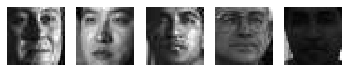

In [0]:
# Random Select and show
import random
fig, axs= plt.subplots(1, 5)
for i in range(5):
    img = random.choice(training_imgs)
    axs[i].imshow(img, cmap='gray')
    # No axis
    axs[i].axis('off')
plt.show()

<p> As for comparison, 10 selfies or the author himself are resized and added into the dataset as shown below. Similarly, 7 for training and 3 for testing.</p>

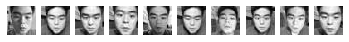

Now, Training set: 2396  Testing set: 1014


In [0]:
mine_imgs= []
mine_labels = []
for file in os.listdir("mine"):
    img = plt.imread("mine/"+file)
    mine_imgs.append(img)
    mine_labels.append(21)
mine_training_imgs = mine_imgs[0:7]
mine_testing_imgs = mine_imgs[7:10]
mine_training_labels = mine_labels[0:7]
mine_testing_labels = mine_labels[7:10]
fig, axs = plt.subplots(1, 10)
for i in range(10):
    img = mine_imgs[i]
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
plt.show()
training_imgs.extend(mine_training_imgs)
training_labels.extend(mine_training_labels)
testing_imgs.extend(mine_testing_imgs)
testing_labels.extend(mine_testing_labels)
print("Now, Training set: {}  Testing set: {}".format(len(training_labels), len(testing_labels)))

<p> Before move on to the next section, those images need to be vectorized </P>

In [0]:
train_x = np.array(training_imgs)
train_y = np.array(training_labels)
test_x = np.array(testing_imgs)
test_y = np.array(testing_labels)
train_x = train_x.reshape(len(training_imgs), -1)
test_x = test_x.reshape(len(testing_imgs), -1)
print("Training set {}    Testing set{}".format(train_x.shape, test_x.shape))


Training set (2396, 1024)    Testing set(1014, 1024)


<h2> 3. PCA</h2>
<p><b>Principal Component analysis (PCA)</b> is a statistical procedure that uses an orthonal transformation to convert a set of obeservations of possibly correlated variables into a set of values of linearly uncorrelated variables called pricipal components. PCA is widely used in demesion reduction</p>
<p> In this section, in order to visualize the distribution, we sample 500 images from the training set and then use PCA to reduce the dimensinality of every image from 1024 to 2 and 3. In following plots, points that corrsponds to selfie photos are highlighted using red star mark</P> 

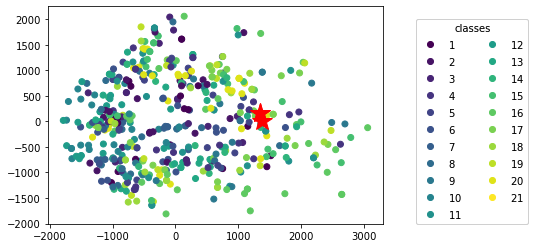

In [0]:
# 3D Plot
from sklearn.decomposition import PCA
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# Sample 500 data points
selection = np.random.choice(range(len(train_x)), 500)
X = train_x[selection, :]
Y = train_y[selection]

# 2D Plot
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=Y)
legend1 = ax.legend(*scatter.legend_elements(num=20), loc=(1.1, 0), title="classes", ncol=2)
plt.plot(X_transformed[Y==21][:, 0], X_transformed[Y==21][:, 1], 'r*', markersize=20)
ax.add_artist(legend1)
plt.show()

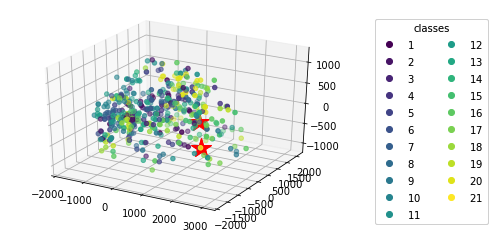

In [0]:
# 3D Plot
pca = PCA(n_components=3)
pca.fit(X)
X_transformed = pca.transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=Y)
legend1 = ax.legend(*scatter.legend_elements(num=20), loc=(1.1, 0), title="classes", ncol=2)
plt.plot(X_transformed[Y==21][:, 0], X_transformed[Y==21][:, 1], X_transformed[Y==21][:, 2], 'r*', markersize=20)
ax.add_artist(legend1)
plt.show()

<p> In additon, 3 eigenfaces of this 3D PCA model are shown below</p> 

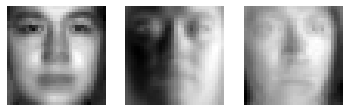

In [0]:
eigenfaces = pca.components_.reshape(3, 32, 32)
fig, axs= plt.subplots(1, 3)
for i in range(3):
    axs[i].imshow(eigenfaces[i, :, :], cmap='gray')
    axs[i].axis('off')
plt.show()

<p> PCA is applied to reduce the dimensionality of face images at first, then the output vectors of PCA which have lower dimension will be feed into a distance based nearest neighbor classifiers to do classification. We set the output dimension of PCA to be 40, 80 and 200 and compare thier classficaiton accuracies.</P>

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
pca_40 = PCA(40)
clf = KNeighborsClassifier()

# pca 40
# Training
pca_40.fit(train_x)
train_x_reduced = pca_40.transform(train_x)
clf.fit(train_x_reduced, train_y)
# Testing 
test_x_reduced = pca_40.transform(test_x)
predictions = clf.predict(test_x_reduced)
score = accuracy_score(test_y, predictions)
print("The accuracy for PCA 40 is: {}".format(score))


The accuracy for PCA 40 is: 0.7899408284023669


In [0]:
pca_80 = PCA(80)
clf = KNeighborsClassifier()

# pca 40
# Training
pca_80.fit(train_x)
train_x_reduced = pca_80.transform(train_x)
clf.fit(train_x_reduced, train_y)
# Testing 
test_x_reduced = pca_80.transform(test_x)
predictions = clf.predict(test_x_reduced)
score = accuracy_score(test_y, predictions)
print("The accuracy for PCA 80 is: {}".format(score))

The accuracy for PCA 80 is: 0.8254437869822485


In [0]:
pca_200 = PCA(200)
clf = KNeighborsClassifier()

# pca 40
# Training
pca_200.fit(train_x)
train_x_reduced = pca_200.transform(train_x)
clf.fit(train_x_reduced, train_y)
# Testing 
test_x_reduced = pca_200.transform(test_x)
predictions = clf.predict(test_x_reduced)
score = accuracy_score(test_y, predictions)
print("The accuracy for PCA 80 is: {}".format(score))

The accuracy for PCA 80 is: 0.8422090729783037


<table>
    <tr>
        <th>Model</th>
        <th>Accuracy</th>
    </tr>
    <tr>
        <td>PCA 40</td>
        <td>0.79</td>
    </tr>
     <tr>
        <td>PCA 80</td>
        <td>0.83</td>
    </tr>
    <tr>
        <td>PCA 200</td>
        <td>0.84</td>
    </tr>   
</table>
<p> During demension reduction process, Some of original information will certainly be lost. However, PCA with higher output dimension suggests less information loss and will finally lead to better classification performances.</p>

<h2> 4. LDA </h2>
<p><b> Linear Discriminant Analysis (LDA)</b> is also a common used techniques in dimension reduction. Same as the previous section, we will visualize the results of LDA dimension reduction at first.</p>

C:\Users\phy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


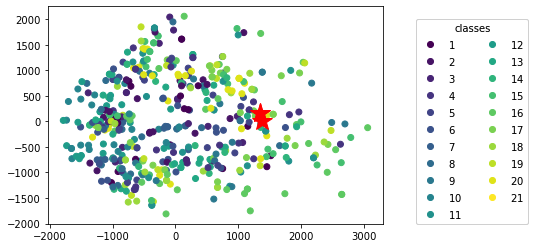

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Plot 2D
lda = LinearDiscriminantAnalysis(n_components=2)
X_transoformed = lda.fit(X, Y).transform(X)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=Y)
legend1 = ax.legend(*scatter.legend_elements(num=20), loc=(1.1, 0), title="classes", ncol=2)
plt.plot(X_transformed[Y==21][:, 0], X_transformed[Y==21][:, 1], 'r*', markersize=20)
ax.add_artist(legend1)
plt.show()

C:\Users\phy\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


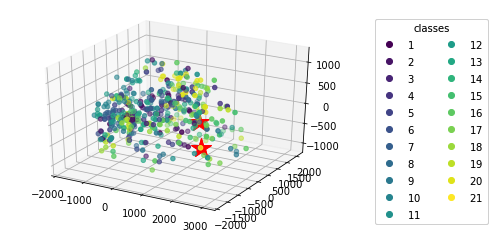

In [0]:
# 3D Plot
lda = LinearDiscriminantAnalysis(n_components=3)
X_transoformed = lda.fit(X, Y).transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=Y)
legend1 = ax.legend(*scatter.legend_elements(num=20), loc=(1.1, 0), title="classes", ncol=2)
plt.plot(X_transformed[Y==21][:, 0], X_transformed[Y==21][:, 1], X_transformed[Y==21][:, 2], 'r*', markersize=20)
ax.add_artist(legend1)
plt.show()

<p> Similarly, investigation on how the output dimension of LDA affects the classfication accuracy is conducted. We still use the same nearset neighbors classfier in previous part and set the output dimension of LDAs to be 2, 3 and 9. </p>


In [0]:
lda_2 = LinearDiscriminantAnalysis(n_components=2)
clf = KNeighborsClassifier()

# lda 2
# Training
lda_2.fit(train_x, train_y)
train_x_reduced = lda_2.transform(train_x)
clf.fit(train_x_reduced, train_y)
# Testing 
test_x_reduced = lda_2.transform(test_x)
predictions = clf.predict(test_x_reduced)
score = accuracy_score(test_y, predictions)
print("The accuracy for LDA 2 is: {}".format(score))


The accuracy for LDA 2 is: 0.3757396449704142


In [0]:
lda_3 = LinearDiscriminantAnalysis(n_components=3)
clf = KNeighborsClassifier()

# lda 2
# Training
lda_3.fit(train_x, train_y)
train_x_reduced = lda_3.transform(train_x)
clf.fit(train_x_reduced, train_y)
# Testing 
test_x_reduced = lda_3.transform(test_x)
predictions = clf.predict(test_x_reduced)
score = accuracy_score(test_y, predictions)
print("The accuracy for LDA 3 is: {}".format(score))

The accuracy for LDA 3 is: 0.6134122287968442


In [0]:
lda_9 = LinearDiscriminantAnalysis(n_components=9)
clf = KNeighborsClassifier()

# lda 2
# Training
lda_9.fit(train_x, train_y)
train_x_reduced = lda_9.transform(train_x)
clf.fit(train_x_reduced, train_y)
# Testing 
test_x_reduced = lda_9.transform(test_x)
predictions = clf.predict(test_x_reduced)
score = accuracy_score(test_y, predictions)
print("The accuracy for LDA 3 is: {}".format(score))

The accuracy for LDA 3 is: 0.908284023668639


<table>
    <tr>
        <th>Model</th>
        <th>Accuracy</th>
    </tr>
    <tr>
        <td>LDA 2</td>
        <td>0.38</td>
    </tr>
     <tr>
        <td>LDA 3</td>
        <td>0.61</td>
    </tr>
    <tr>
        <td>LDA 9</td>
        <td>0.91</td>
    </tr>   
</table>
<P> With the increase of output dimension of LDA, the classfication accuray increases dramatically. LDA with 9 output dimension outperforms PCA with 200 dimession. In terms of the efficiency of dimension reduction, LDA is better than PCA in this case since LDA can maintain critical information for classfication and at the same time keep the reduced dimension as small as possible.</p> 

<h2>5. SVM</h2>
<p><b>Support Vector Machines(SVM)</b> are are supervised learning models that represents the examples as points in space. Example points are mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.
<p> In this section we will first pre-process the dataset using PCA with output dimension set to be 80 and 200. Then based on the processed data, we will train linear SVMs with different penalty parameters and evaluate their performs in terms of classfication accuracy.    

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
# PCA 80
pca_80.fit(train_x)
train_x_reduced = pca_80.transform(train_x)
test_x_reduced = pca_80.transform(test_x)
# C =0.01
svm_1 = svm.LinearSVC(C=0.01)
# C = 0.1
svm_2 = svm.LinearSVC(C=0.1)
# C = 1
svm_3 = svm.LinearSVC(C=1)

svm_1.fit(train_x_reduced, train_y)
predictions = svm_1.predict(test_x_reduced)
score_1 = accuracy_score(test_y, predictions)

svm_2.fit(train_x_reduced, train_y)
predictions = svm_2.predict(test_x_reduced)
score_2 = accuracy_score(test_y, predictions)

svm_3.fit(train_x_reduced, train_y)
predictions = svm_3.predict(test_x_reduced)
score_3 = accuracy_score(test_y, predictions)
print("Accuracy of SVM with C = 0.01: {}\nAccuracy of SVM with C = 0.1: {}\nAccuracy of SVM with C = 1: {}".format(score_1, score_2, score_3))




Accuracy of SVM with C = 0.01: 0.7238658777120316
Accuracy of SVM with C = 0.1: 0.7652859960552268
Accuracy of SVM with C = 1: 0.7021696252465484


In [0]:
# PCA 200
pca_200.fit(train_x)
train_x_reduced = pca_200.transform(train_x)
test_x_reduced = pca_200.transform(test_x)
# C =0.01
svm_1 = svm.LinearSVC(C=0.01)
# C = 0.1
svm_2 = svm.LinearSVC(C=0.1)
# C = 1
svm_3 = svm.LinearSVC(C=1)

svm_1.fit(train_x_reduced, train_y)
predictions = svm_1.predict(test_x_reduced)
score_1 = accuracy_score(test_y, predictions)

svm_2.fit(train_x_reduced, train_y)
predictions = svm_2.predict(test_x_reduced)
score_2 = accuracy_score(test_y, predictions)

svm_3.fit(train_x_reduced, train_y)
predictions = svm_3.predict(test_x_reduced)
score_3 = accuracy_score(test_y, predictions)
print("Accuracy of SVM with C = 0.01: {}\nAccuracy of SVM with C = 0.1: {}\nAccuracy of SVM with C = 1: {}".format(score_1, score_2, score_3))


Accuracy of SVM with C = 0.01: 0.8944773175542406
Accuracy of SVM with C = 0.1: 0.9013806706114399
 Accuracy of SVM with C = 1: 0.8895463510848126


<ul>
    <li>
    <p><b>PCA 80</b></p>
    <table>
    <tr>
        <th>Model</th>
        <th>Accuracy</th>
    </tr>
    <tr>
        <td>C=0.01</td>
        <td>0.72</td>
    </tr>
     <tr>
        <td>C=0.1</td>
        <td>0.76</td>
    </tr>
    <tr>
        <td>C=1</td>
        <td>0.70</td>
    </tr>   
    </table>
    </li>
    <li>
    <p></b>PCA 200</b></p>
    <table>
    <tr>
        <th>Model</th>
        <th>Accuracy</th>
    </tr>
    <tr>
        <td>C=0.01</td>
        <td>0.89</td>
    </tr>
     <tr>
        <td>C=0.1</td>
        <td>0.90</td>
    </tr>
    <tr>
        <td>C=1</td>
        <td>0.89</td>
    </tr>   
    </table>
    </li>
</ul>
<p> According to the table above, on the one hand SVMs have better performance when PCA with 200 output dimension is used for pre-procesing. On the other hand, no matter which PCA is used for pre-precessing, SVM with C set to 0.1 will have better performance than others.</p>  

<h2>6. Neural Networks</h2>
<p> In thise section, we implement a <b>Convolutional Neural Networks (CNN) </b> to handle the classfication problems. The model is defined as code below: </P> 


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Dropout, Flatten, MaxPooling2D
import keras
batch_size = 128
epochs = 12

model = Sequential()
# First Conv
model.add(Conv2D(20, kernel_size=(5, 5), activation='relu' ,input_shape=(32, 32, 1)))
# First Maxpooling
model.add(MaxPooling2D(pool_size=(2 ,2), strides=2))
model.add(Conv2D(50, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2 ,2), strides=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(21, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])




model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 50)        25050     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 50)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1250)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               625500    
_________________________________________________________________
dense_11 (Dense)             (None, 21)              

In [0]:
from keras.utils import to_categorical
x_train = train_x.reshape(train_x.shape[0], 32, 32 ,1)
x_test = test_x.reshape(test_x.shape[0], 32, 32, 1)
y_train = [data-1 for data in train_y]
y_train = to_categorical(y_train)
y_test = [data-1 for data in  test_y]
y_test = to_categorical(y_test)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
2396/2396 [==============================] - 2s 753us/step - loss: 9.8142 - accuracy: 0.1611
Epoch 2/12
2396/2396 [==============================] - 1s 605us/step - loss: 1.8688 - accuracy: 0.5067
Epoch 3/12
2396/2396 [==============================] - 2s 646us/step - loss: 0.6481 - accuracy: 0.8364
Epoch 4/12
2396/2396 [==============================] - 2s 626us/step - loss: 0.2191 - accuracy: 0.9487
Epoch 5/12
2396/2396 [==============================] - 1s 604us/step - loss: 0.0922 - accuracy: 0.9816
Epoch 6/12
2396/2396 [==============================] - 1s 623us/step - loss: 0.1612 - accuracy: 0.9616
Epoch 7/12
2396/2396 [==============================] - 2s 641us/step - loss: 0.6459 - accuracy: 0.8614
Epoch 8/12
2396/2396 [==============================] - 2s 639us/step - loss: 0.0297 - accuracy: 0.9967
Epoch 9/12
2396/2396 [==============================] - 1s 607us/step - loss: 0.0158 - accuracy: 0.9987
Epoch 10/12
2396/2396 [==============================] - 1s 598u

<p> CNN achieves <font color='red'>0.97</font> accuracy in testing set. Compared with other models, CNN's leads in image classfication indeed looks daunting.